# Advertising Sales Channel Prediction

# Problem Statement:

Sales Channel Prediction Case Study-  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. Then predict the total sales generated from all the sales channel.  

# Objective

* It is not possible for our client to directly increase sales of the product, but they can control the advertising expenditure in each of the three media.
* Therefore, if we determine that there is an association between advertising and sales, then we can instruct our client to adjust advertising budgets, thereby indirectly increasing sales.

# Importing Dataset and Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Advertising_Sales.csv",index_col=0)
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


* Since the sales column have continuous numbers we have the regression problem
* The Advertising data set consists of the sales of that product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper.

# Exploratory Data Analysis

# 1- Data Exploration

In [3]:
df.shape

(200, 4)

In [4]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

* We have 200 rows and 4 columns
* The column names are TV, radio, newspaper, sales.

In [5]:
#Checking the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


* All the data features are in float data type.
* No null values.

Our Dataset is good to go

In [6]:
#checking unique values 

df.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

In [7]:
#checking null values

df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
#checking for empty observations

df.loc[df['TV'] == " "]

,TV,radio,newspaper,sales


In [9]:
df.loc[df['radio'] == " "]

,TV,radio,newspaper,sales


In [10]:
df.loc[df['newspaper'] == " "]

,TV,radio,newspaper,sales


In [11]:
df.loc[df['sales'] == " "]

,TV,radio,newspaper,sales


I do not have any null values and no spaces in my dataset.

In [12]:
#data description

df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Here we cane see that:
 
* Minimum value of radio is 0
* We can see that all the columns have count 200
* The mean and Median of TV and radio are almost similar
* The maximum sales according to the dataset is 27

# 2- Data Visualization

# a- Univariate analysis

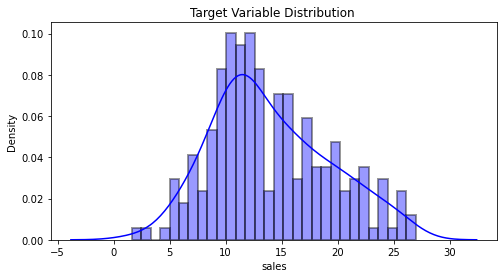

In [13]:
#distplot of target variable

plt.figure(figsize=[8,4])
sns.distplot(df["sales"], color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution ')
plt.show()

The distribution os target variable looks almost normal

<AxesSubplot:xlabel='TV', ylabel='Density'>

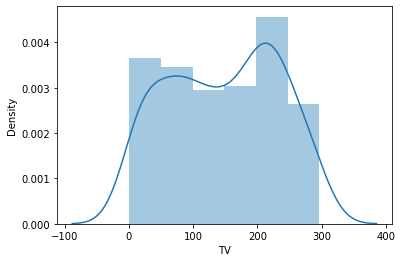

In [14]:
#distplot for each features

sns.distplot(df['TV'],kde=True)

<AxesSubplot:xlabel='radio', ylabel='Density'>

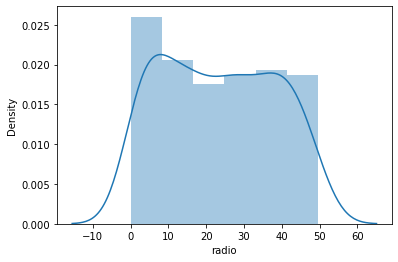

In [15]:
sns.distplot(df['radio'],kde=True)

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

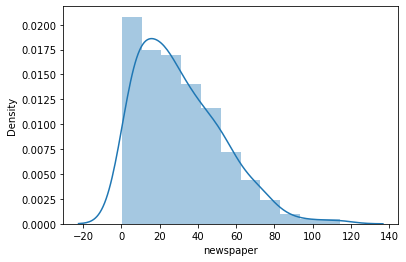

In [16]:
sns.distplot(df['newspaper'],kde=True)

Observations:
    
* The distplot for TV and radio are symmetrical, i.e, Mean and median are almost similar
* The distplot for newspaper shows not normal.i.e skewness is present in newspaper.
* The distplot for sales are almost normal

# b- Bivariate analysis

<AxesSubplot:title={'center':'Comparision between TV and Sales'}, xlabel='TV', ylabel='sales'>

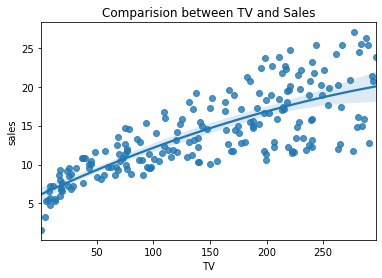

In [17]:
plt.title('Comparision between TV and Sales')
sns.regplot(df['TV'],df['sales'],order=2)

<AxesSubplot:xlabel='radio', ylabel='sales'>

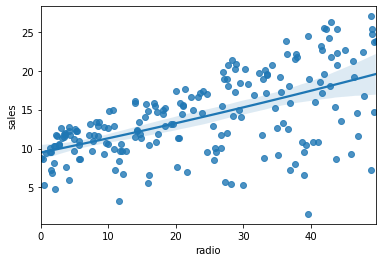

In [18]:
sns.regplot(x='radio',y='sales',data=df,order=2)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

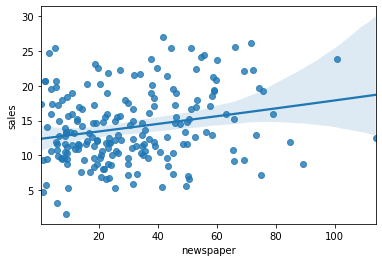

In [19]:
sns.regplot(x='newspaper',y='sales',data=df,order=2)

Observations:

* The regplot of newspaper and sales shows that it is more linear. As TV budget increases the   sales increase. But somepoints even tv budget increased the sales did not increase.
* The regplot of radio and sales shows that it is linear and there is no curve.
* The regplot of newspaper and sales are almost a straight line as it shows there can be no     much sales difference as newspaper budget increases.
* We can see outliers in radio and newspaper.

# c- Multivariate analysis

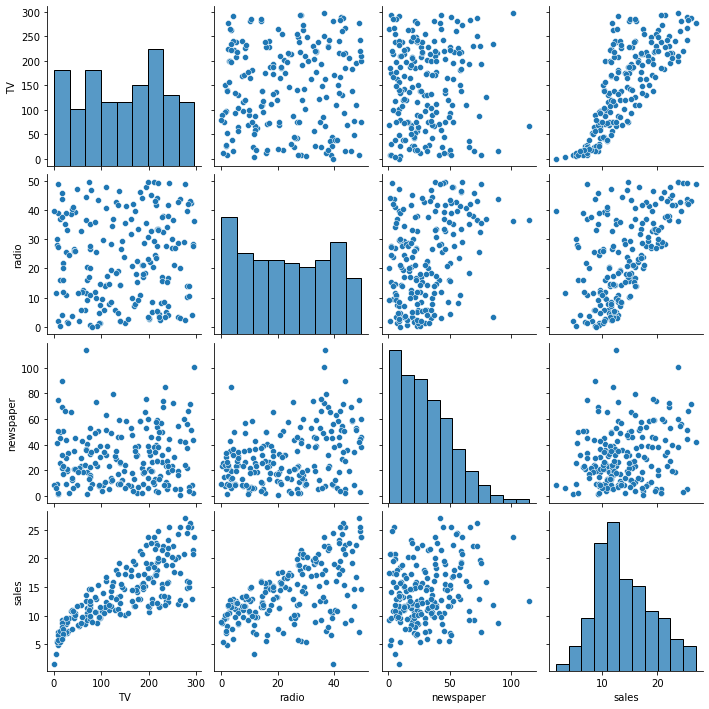

In [20]:
sns.pairplot(df)

In the above graph we can see that:
* scatterplot between TV and Radio are spreaded along
* scatterplot between TV and newspaper are not increasing but on the lower side
* scatterplot between Radio and newspaper are on the increasing side.
* The values are much scattered for independent variable, which indicates less correlation.

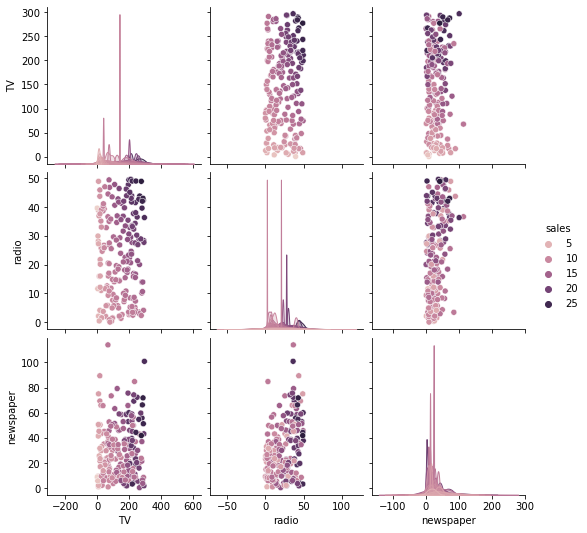

In [21]:
sns.pairplot(df,hue="sales")

* We can clearly visualize that TV has dominant role in increasing the sales compared to Radio or newspaper. TV is in linear relationship with Sales, followed by Radio then newspaper.

# 3- Data Cleaning and Feature Engineering

# a) Checking Outliers and Removing them

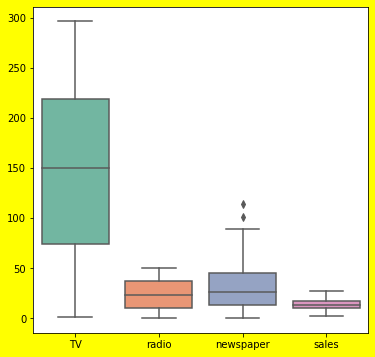

In [22]:
plt.figure(figsize=(6,6), facecolor='Yellow')
sns.boxplot(data=df, palette='Set2')
plt.show()

We have a very few outliers present in Newspaper. we can remove it by Zscore method

In [23]:
from scipy.stats import zscore
z=np.abs(zscore(df[["newspaper"]]))
df_new=df[(z<3).all(axis=1)]
df_new

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [24]:
df_new.shape

(198, 4)

In [25]:
losspercentage=(((200-198)/200)*100)
losspercentage

1.0

The dataloss after removing outliers is 1% which is less than 10% so we can proceed with the new data.

# b) Checking Skewness and removing them 

In [26]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

We have a little skewness present in newspaper. 

In [27]:
#removing skewness

from sklearn.preprocessing import PowerTransformer
transform = PowerTransformer(method='yeo-johnson')
cols=['newspaper']
df_new[cols] = transform.fit_transform(df_new[cols].values)

In [28]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.101288
sales        0.407130
dtype: float64

Hence, the skewness is removed

# c) Correlation

In [29]:
df_new.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.051978,0.038288,0.779121
radio,0.051978,1.000000,0.296570,0.576748
newspaper,0.038288,0.296570,1.000000,0.191387
sales,0.779121,0.576748,0.191387,1.000000


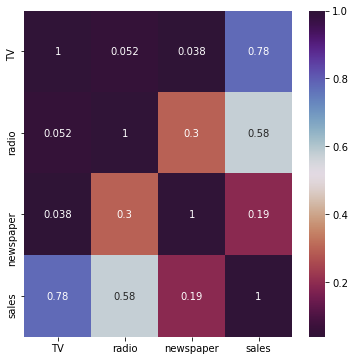

In [30]:
corr = df_new.corr()
plt.figure(figsize=(6,6), facecolor='white')
sns.heatmap(corr, annot=True,cmap='twilight_shifted_r')
plt.show()

* low correlation among variables under ideal conditions.
* It is evident from the graph that, the independent and dependent variables are in good         correlation range.
* TV and sales are in good correlation(0.78).
* Radio and sales have moderate correlation(0.58)
* Newspaper and Sales are less corelated(0.19).

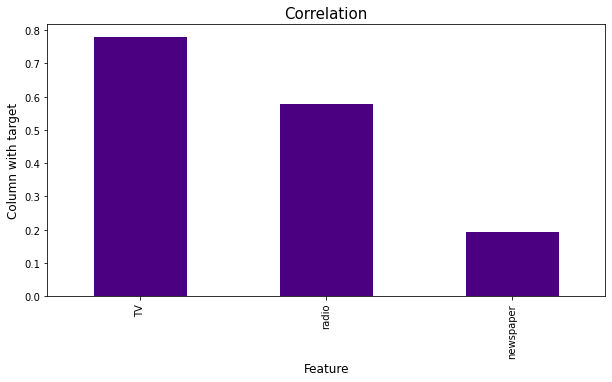

In [31]:
plt.figure(figsize=(10,5))
df_new.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='indigo')
plt.xlabel('Feature',fontsize=12)
plt.ylabel("Column with target",fontsize=12)
plt.title("Correlation",fontsize=15)
plt.show()

In [32]:
#Final data for modeling

df_new

,TV,radio,newspaper,sales
1,230.1,37.8,1.604196,22.1
2,44.5,39.3,0.831044,10.4
3,17.2,45.9,1.607052,9.3
4,151.5,41.3,1.283768,18.5
5,180.8,10.8,1.280622,12.9
...,...,...,...,...
196,38.2,3.7,-0.687435,7.6
197,94.2,4.9,-1.146090,9.7
198,177.0,9.3,-1.314437,12.8
199,283.6,42.0,1.517395,25.5


# d) Data Preprocessing

In [33]:
#Assigning values of Independant variables to x and Dependant variable or target to y

x = df_new.drop("sales",axis=1)
y = df_new["sales"]

In [34]:
x

,TV,radio,newspaper
1,230.1,37.8,1.604196
2,44.5,39.3,0.831044
3,17.2,45.9,1.607052
4,151.5,41.3,1.283768
5,180.8,10.8,1.280622
...,...,...,...
196,38.2,3.7,-0.687435
197,94.2,4.9,-1.146090
198,177.0,9.3,-1.314437
199,283.6,42.0,1.517395


In [35]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 198, dtype: float64

# e) Scaling the Data

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

In [38]:
x

,TV,radio,newspaper
0,0.783202,0.762097,0.878788
1,0.149539,0.792339,0.703678
2,0.056333,0.925403,0.879435
3,0.514851,0.832661,0.806215
4,0.614886,0.217742,0.805502
...,...,...,...
193,0.128030,0.074597,0.359758
194,0.319222,0.098790,0.255878
195,0.601912,0.187500,0.217749
196,0.965859,0.846774,0.859129


# 4- Modeling

In [39]:
#importing Libraries for testing and predicting

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [40]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',i)

The max accuracy is 0.9358346827439896 seen for random state: 99


In [41]:
#selecting 99 as randomstate as we got best result

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=max_RS)

In [42]:
#Linear Regression

lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)

print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
cv = cross_val_score(lm, x,y,cv=5)
print('The cross validation score', cv.mean())


The r2 score is: 0.9358346827439896
The mean absolute error 1.0293867863083983
The mean squared error 1.5796296226361297
The cross validation score 0.8857739370001966


In [43]:
#Hyperparameter tuning for Linear Regression

par_grid =  {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_lm = GridSearchCV(estimator=lm, param_grid=par_grid, cv=5,n_jobs=1, verbose=1)

grid_lm.fit(x_train, y_train)
print("The best estimators:", grid_lm.best_estimator_)
print("The best score:", grid_lm.best_score_)
print("The best parameters:", grid_lm.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
The best estimators: LinearRegression(normalize=True)
The best score: 0.8517266552462008
The best parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [44]:
#RE INSTANTIATING WITH BEST PARAMETERS

grid_lm = LinearRegression(copy_X=True, fit_intercept=True, normalize=True)
grid_lm.fit(x_train, y_train)
y_pred1 = lm.predict(x_test)

print('The r2 score is:', r2_score(y_test, y_pred1))
print('The mean absolute error', mean_absolute_error(y_test, y_pred1))
print('The mean squared error', mean_squared_error(y_test, y_pred1))
cv = cross_val_score(grid_lm, x,y,cv=5)
print('The cross validation score', cv.mean())

The r2 score is: 0.9358346827439896
The mean absolute error 1.0293867863083983
The mean squared error 1.5796296226361297
The cross validation score 0.8857739370001966


In [45]:
#Lasso Regularization

ls = Lasso()
ls.fit(x_train,y_train)

Lasso()

In [46]:
pred = ls.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
cv = cross_val_score(ls, x,y,cv=5)
print('The cross validation score', cv.mean())

The r2 score is: 0.18088286896217554
The mean absolute error 3.7833304778511203
The mean squared error 20.16512564620518
The cross validation score 0.1545277837938553


In [47]:
#Lasso has very less score and high error. applying GridsearchCV to improve accuracy

param = {'alpha': np.arange(0.0001,0.1,0.001)}
grid_ls= GridSearchCV(estimator=ls,param_grid=param,n_jobs=2,cv=5,verbose=2)

grid_ls.fit(x_train,y_train)
pred1 = grid_ls.predict(x_test)
print("The best estimators:", grid_ls.best_estimator_)
print('The r2 score is:', r2_score(y_test, pred1))
print("The best score:", grid_ls.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
The best estimators: Lasso(alpha=0.0031)
The r2 score is: 0.9358245007480164
The best score: 0.8517410052751115


In [48]:
#RE INSTANTIATING WITH BEST PARAMETERS

ls = Lasso(alpha=0.0031)
ls.fit(x_train,y_train)
pred = ls.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
cv = cross_val_score(ls, x,y,cv=5)
print('The cross validation score', cv.mean())

The r2 score is: 0.9358245007480164
The mean absolute error 1.0287032030020764
The mean squared error 1.5798802842574635
The cross validation score 0.8860921613522178


We have improved the score very high

In [49]:
#KNN Algorithm

knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
cv = cross_val_score(knn, x,y,cv=5)
print('The cross validation score', cv.mean())

The r2 score is: 0.9418441969804539
The mean absolute error 0.8663333333333334
The mean squared error 1.4316866666666663
The cross validation score 0.9407052322824345


In [50]:
#applying GridsearchCV to improve accuracy

param = {'algorithm':['kd_tree'], 
         'n_neighbors':[3,2,4,6,8,10,14,7,11]}
grid_knn = GridSearchCV(estimator=knn, param_grid=param)
grid_knn.fit(x_train,y_train)

grid_knn.fit(x_train,y_train)

pred1 = grid_knn.predict(x_test)

print("The best estimators:", grid_knn.best_estimator_)
print('The r2 score is:', r2_score(y_test, pred1))
print("The best score:", grid_knn.best_score_)

The best estimators: KNeighborsRegressor(algorithm='kd_tree', n_neighbors=4)
The r2 score is: 0.9402616568372621
The best score: 0.9294748034132223


In [51]:
#Random Forest Regressor

rdf = RandomForestRegressor()
rdf.fit(x_train,y_train)
y_pred = rdf.predict(x_test)

print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
cv = cross_val_score(rdf, x,y,cv=5)
print('The cross validation score', cv.mean())

The r2 score is: 0.9658293474861113
The mean absolute error 0.7513333333333326
The mean squared error 0.8412172999999981
The cross validation score 0.9761350783924968


In [52]:
#Support vector Regressor

svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
cv = cross_val_score(svr, x,y,cv=5)
print('The cross validation score', cv.mean())

R2_score: 0.9388708730222921
The cross validation score 0.91278463451271


In [53]:
#SGD Regressor

sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
cv = cross_val_score(sgd, x,y,cv=5)
print('The cross validation score', cv.mean())

R2_score: 0.9207050977076704
The cross validation score 0.882865406137137


# From above we can see that Random Forest Regressor has the best R2 score (97.06) and CV Score(97.55) and both are equal. So we can take random forest regressor as our final model.

In [54]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    rf = RandomForestRegressor()
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',i)

The max accuracy is 0.9878752381948184 seen for random state: 99


In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=max_RS)

In [56]:
#hyperparameter tuning for RandomForest regressor

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)
pred1 = grid_search.predict(x_test)

print("The best estimators:", grid_search.best_estimator_)
print('The r2 score is:', r2_score(y_test, pred1))
print("The best score:", grid_search.best_score_)


Fitting 3 folds for each of 288 candidates, totalling 864 fits
The best estimators: RandomForestRegressor(max_depth=90, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=200)
The r2 score is: 0.9796281857439498
The best score: 0.941437480618765


In [59]:
Final_Model=RandomForestRegressor(max_depth=90, max_features=3, min_samples_leaf=3,min_samples_split=8, n_estimators=200)
Final_Model.fit(x_train,y_train)
pred=Final_Model.predict(x_test)
acc= r2_score(y_test,pred)
print('The r2 score is:', acc*100)
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
cv = cross_val_score(rdf, x,y,cv=5)
print('The cross validation score', (cv.mean()*100))

The r2 score is: 97.98007211977274
The mean absolute error 5.393533333333336
The mean squared error 47.02744063333336
The cross validation score 97.66792366806321


# 5-Saving the Model for forecasting

In [60]:
import joblib
joblib.dump(Final_Model,"Advertisement_Sales_Channel_Prediction.pkl")

['Advertisement_Sales_Channel_Prediction.pkl']

<AxesSubplot:>

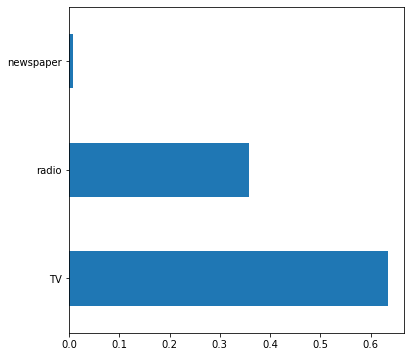

In [61]:
feat_importances = pd.Series(Final_Model.feature_importances_, index=x.columns)
feat_importances.nlargest(100).plot(kind='barh',figsize=(6,6))